In [49]:
import torch
from torch import nn
from torch.utils.data import DataLoader
import torchvision
from torchvision import transforms

import matplotlib.pyplot as plt

### Loading Fashion MNIST data

In [ ]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_data = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_data = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

In [63]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_data = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_data = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

100%|██████████| 26421880/26421880 [00:08<00:00, 3157591.01it/s]


Extracting ./data\FashionMNIST\raw\train-images-idx3-ubyte.gz to ./data\FashionMNIST\raw



100%|██████████| 29515/29515 [00:00<00:00, 111763.54it/s]


Extracting ./data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to ./data\FashionMNIST\raw



100%|██████████| 4422102/4422102 [00:02<00:00, 1988072.63it/s]


Extracting ./data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to ./data\FashionMNIST\raw



100%|██████████| 5148/5148 [00:00<?, ?it/s]

Extracting ./data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\FashionMNIST\raw



In [51]:
BATCH_SIZE=64

In [52]:
def dataloader(BATCH_SIZE=BATCH_SIZE):
    return DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True), DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=False)

In [53]:
train_dataloader, test_dataloader = dataloader(BATCH_SIZE=BATCH_SIZE)

In [54]:
print(f"Dataloaders: {train_dataloader, test_dataloader}") 
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x0000029F92D68C40>, <torch.utils.data.dataloader.DataLoader object at 0x0000029F92D68760>)
Length of train dataloader: 938 batches of 64
Length of test dataloader: 157 batches of 64


In [55]:
class_names = train_data.classes
class_names

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [56]:
train_data_feature, train_data_label = next(iter(train_dataloader))
train_data_feature.shape, train_data_label.shape

(torch.Size([64, 1, 28, 28]), torch.Size([64]))

In [57]:
def visualize_data(index=torch.randint(0, len(train_data_feature), size=[1]).item()):
    image, label = train_data_feature[index], train_data_label[index]
    plt.imshow(image.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False)
    print(f"Label {label}:\nClass Name = {class_names[label]}\nImage shape = {image.shape}")
    plt.show()

Label 5:
Class Name = 5 - five
Image shape = torch.Size([1, 28, 28])


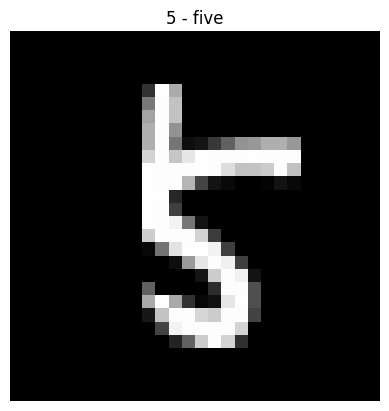

In [62]:
visualize_data(index=63)